<a href="https://colab.research.google.com/github/daivik05/face_detection/blob/main/face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [ ]:
repo_name = 'face_detection'
repo_url = f'https://github.com/daivik05/face_detection'
!git clone https://github.com/daivik05/face_detection

Cloning into 'face_detection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 2.37 MiB | 12.57 MiB/s, done.


In [ ]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()


In [ ]:
def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

In [ ]:
project_dir = f'/content/{repo_name}'
%cd $project_dir

/content/face_detection


In [ ]:
df = pd.read_csv("face_data.csv")

(400, 4096)


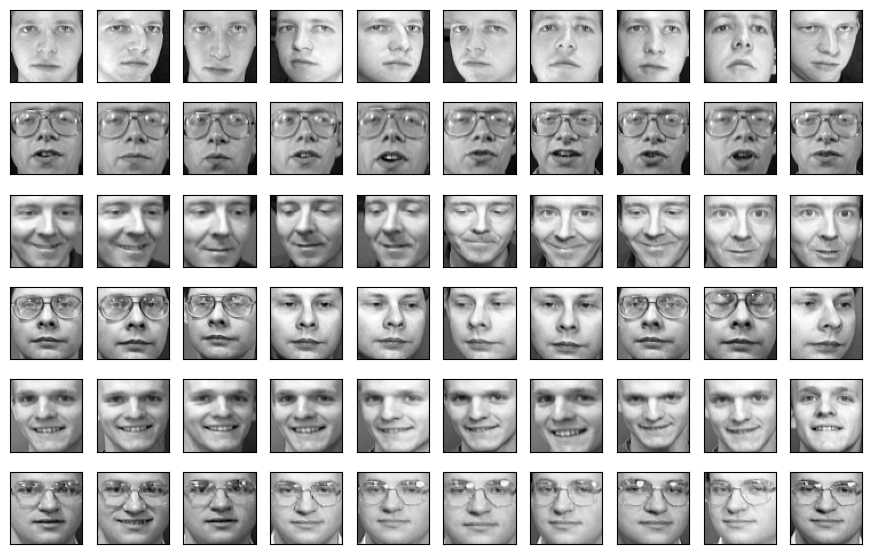

In [ ]:
df = pd.read_csv("face_data.csv")
targets = df["target"]
pixels = df.drop(["target"], axis=1)

print(np.array(pixels).shape)

show_orignal_images(pixels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)


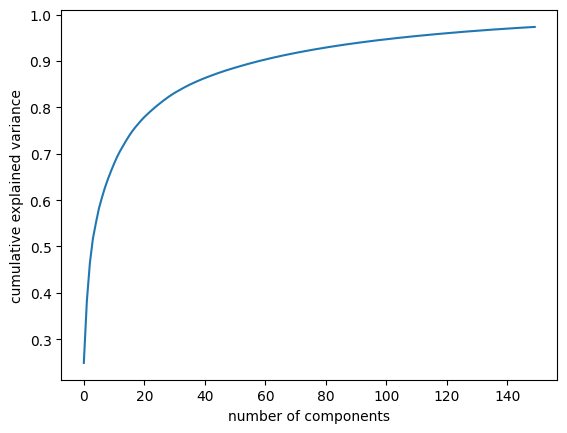

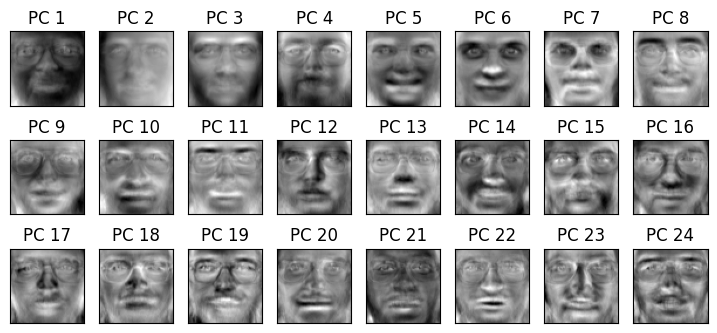

In [ ]:
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

show_eigenfaces(pca)

In [ ]:
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)

Projecting the input data on the eigenfaces orthonormal basis


In [ ]:
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.074s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00 